<a href="https://colab.research.google.com/github/ErickRdzc11222/portafolio.github.io/blob/main/arnold_cat_map_182508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

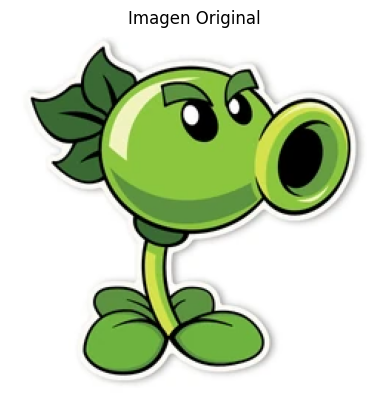


Número de iteraciones necesarias para recuperar la imagen: 750

Correlación (Original vs. Original): 1.0000
Correlación (Original vs. Distorsionada): -0.0859
Correlación (Original vs. Recuperada): 1.0000


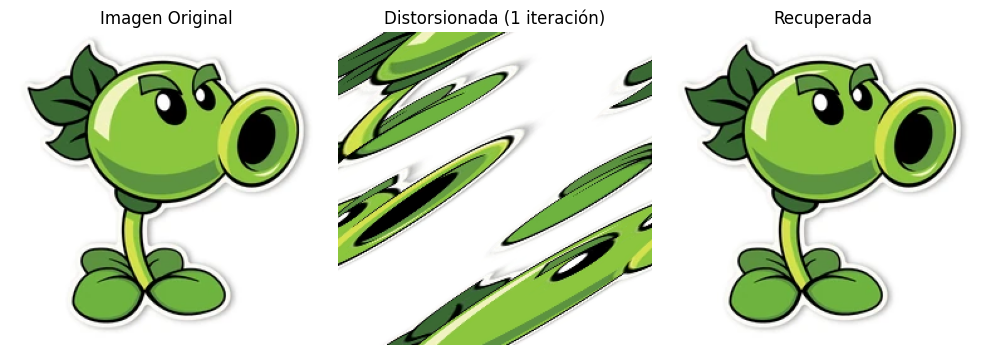

In [2]:
# Importación de módulos necesarios
import os  # Para trabajar con archivos y rutas
import numpy as np  # Para cálculo de correlaciones
import matplotlib.pyplot as plt  # Para mostrar imágenes
from PIL.Image import open as load_pic, new as new_pic  # Funciones de Pillow para abrir y crear imágenes

# ========================================
# FUNCIÓN 1: Arnold Cat Map
# ========================================
def arnold_cat_map(image):
    """
    Aplica una iteración del Arnold Cat Map sobre la imagen.

    Params:
        image: PIL.Image
            Imagen cuadrada de entrada

    Returns:
        new_image: PIL.Image
            Imagen después de aplicar el mapeo
    """
    width, height = image.size  # Obtener dimensiones de la imagen (deben ser iguales)
    new_image = new_pic(image.mode, (width, height))  # Crear nueva imagen en blanco

    for x in range(width):
        for y in range(height):
            # Cálculo de nuevas coordenadas (mapa caótico)
            nx = (2 * x + y) % width
            ny = (x + y) % height

            # Insertar el píxel transformado en la nueva imagen (ajustando altura)
            new_image.putpixel((nx, height - ny - 1), image.getpixel((x, height - y - 1)))

    return new_image

# ========================================
# FUNCIÓN 2: Encontrar el ciclo de recuperación
# ========================================
def find_recovery_cycle(original_image):
    """
    Encuentra cuántas iteraciones del Arnold Cat Map son necesarias para recuperar la imagen original.

    Params:
        original_image: PIL.Image
            Imagen original cuadrada

    Returns:
        count: int
            Número de iteraciones necesarias para volver a la imagen original
    """
    current_image = original_image.copy()
    count = 0

    while True:
        count += 1
        current_image = arnold_cat_map(current_image)

        # Comparación directa de los datos de imagen
        if list(current_image.getdata()) == list(original_image.getdata()):
            break  # Imagen recuperada

    return count

# ========================================
# FUNCIÓN 3: Calcular correlación
# ========================================
def image_correlation(img1, img2):
    """
    Calcula la correlación entre dos imágenes usando correlación de Pearson.

    Params:
        img1, img2: PIL.Image
            Imágenes a comparar

    Returns:
        correlation: float
            Valor entre -1 y 1 indicando la similitud
    """
    # Convertir a escala de grises y luego a vectores 1D
    img1_array = np.array(img1.convert("L")).flatten()
    img2_array = np.array(img2.convert("L")).flatten()

    # Calcular correlación de Pearson
    correlation = np.corrcoef(img1_array, img2_array)[0, 1]
    return correlation

# ========================================
# FUNCIÓN PRINCIPAL
# ========================================
def main():
    path = "plant.png"  # Ruta a la imagen

    # Verificar que la imagen exista
    if not os.path.exists(path):
        print("Imagen no encontrada en el directorio actual.")
        return

    # Abrir la imagen original
    original = load_pic(path)

    # Validar que sea cuadrada
    if original.size[0] != original.size[1]:
        print("La imagen debe ser cuadrada (por ejemplo 255x255).")
        return

    # Mostrar la imagen original
    plt.imshow(original)
    plt.title("Imagen Original")
    plt.axis("off")
    plt.show()

    # Aplicar 1 iteración del Arnold Cat Map
    distorted_once = arnold_cat_map(original)

    # Encontrar cuántas iteraciones se necesitan para recuperar la original
    iterations_needed = find_recovery_cycle(original)
    print(f"\nNúmero de iteraciones necesarias para recuperar la imagen: {iterations_needed}")

    # Aplicar el mapeo las veces necesarias para recuperar la imagen original
    recovered = original.copy()
    for _ in range(iterations_needed):
        recovered = arnold_cat_map(recovered)

    # Calcular correlaciones
    corr_original = image_correlation(original, original)
    corr_distorted = image_correlation(original, distorted_once)
    corr_recovered = image_correlation(original, recovered)

    # Imprimir correlaciones
    print(f"\nCorrelación (Original vs. Original): {corr_original:.4f}")
    print(f"Correlación (Original vs. Distorsionada): {corr_distorted:.4f}")
    print(f"Correlación (Original vs. Recuperada): {corr_recovered:.4f}")

    # Mostrar imágenes comparativas
    titles = ["Imagen Original", "Distorsionada (1 iteración)", "Recuperada"]
    images = [original, distorted_once, recovered]

    plt.figure(figsize=(10, 4))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# ========================================
# PUNTO DE ENTRADA
# ========================================
if __name__ == "__main__":
    main()
